<a href="https://colab.research.google.com/github/LukasPurbaW/Stock-Prediction-with-Prophet/blob/main/Stock_Prediction_with_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Install yfinance

In [1]:
!pip -qq install yfinance

     |████████████████████████████████| 6.4 MB 4.5 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Forecasting Stocks from Yahoo Finance with Prophet

In [2]:
import yfinance as yf

# berkshire hathaway inc. (b stock)
brk = yf.Ticker('TSLA')
hist = brk.history(period="max", auto_adjust=True)
hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [3]:
import pandas as pd
df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail()

,ds,y
2940,2022-03-03,839.289978
2941,2022-03-04,838.289978
2942,2022-03-07,804.580017
2943,2022-03-08,824.400024
2944,2022-03-09,858.969971


In [10]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=True)
m.fit(df)

In [11]:
future = m.make_future_dataframe(365, freq='D')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
3303,2023-03-03,1452.000771,1385.068866,1520.486803
3304,2023-03-04,1454.107458,1384.051243,1522.180198
3305,2023-03-05,1454.961182,1386.326654,1518.720565
3306,2023-03-06,1456.209779,1385.627622,1518.868375
3307,2023-03-07,1456.930022,1387.858670,1526.115151
3308,2023-03-08,1458.225907,1390.102018,1530.370084
3309,2023-03-09,1458.994289,1389.814313,1533.072243


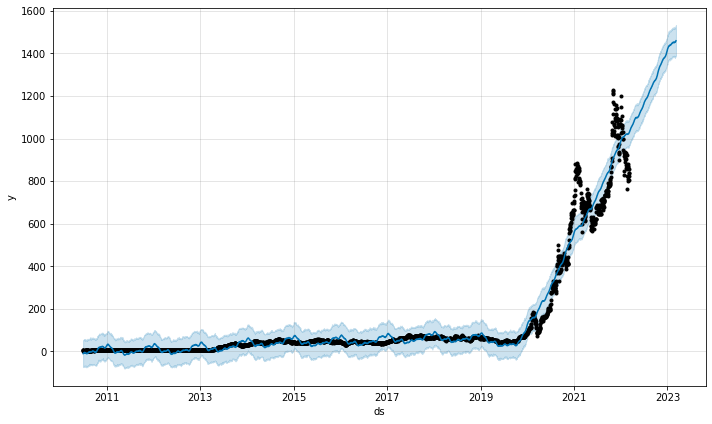

In [12]:
m.plot(forecast);

## Make it a Function

In [13]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)
    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)
    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()
    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')
    forecast = m.predict(future)
    m.plot(forecast)
    return forecast

#### Make some Forecasts with that Function

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-09-28,467.429145,204.039012,763.516275,467.429145,467.429145,27.537146,27.537146,27.537146,-10.190718,-10.190718,-10.190718,37.727864,37.727864,37.727864,0.0,0.0,0.0,494.966291
1,2004-09-29,468.077701,222.728165,782.844518,468.077701,468.077701,33.691146,33.691146,33.691146,-5.875819,-5.875819,-5.875819,39.566965,39.566965,39.566965,0.0,0.0,0.0,501.768847
2,2004-09-30,468.726258,231.726382,788.256880,468.726258,468.726258,36.587074,36.587074,36.587074,-4.626839,-4.626839,-4.626839,41.213913,41.213913,41.213913,0.0,0.0,0.0,505.313332
3,2004-10-01,469.374814,221.792323,779.872353,469.374814,469.374814,39.829196,39.829196,39.829196,-2.812796,-2.812796,-2.812796,42.641992,42.641992,42.641992,0.0,0.0,0.0,509.204010
4,2004-10-04,471.320483,220.530009,796.114575,471.320483,471.320483,38.480743,38.480743,38.480743,-6.933700,-6.933700,-6.933700,45.414443,45.414443,45.414443,0.0,0.0,0.0,509.801226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4504,2022-09-02,3500.111038,3234.623848,3829.684455,3448.131793,3539.742981,21.532054,21.532054,21.532054,-2.812796,-2.812796,-2.812796,24.344850,24.344850,24.344850,0.0,0.0,0.0,3521.643092
4505,2022-09-03,3500.258271,3249.825892,3830.384169,3447.802655,3540.147934,37.568718,37.568718,37.568718,15.219936,15.219936,15.219936,22.348782,22.348782,22.348782,0.0,0.0,0.0,3537.826989
4506,2022-09-04,3500.405504,3255.091360,3818.293761,3447.368737,3540.805320,35.647478,35.647478,35.647478,15.219935,15.219935,15.219935,20.427543,20.427543,20.427543,0.0,0.0,0.0,3536.052982
4507,2022-09-05,3500.552737,3235.580632,3785.865694,3447.100608,3541.868991,11.680744,11.680744,11.680744,-6.933700,-6.933700,-6.933700,18.614444,18.614444,18.614444,0.0,0.0,0.0,3512.233481


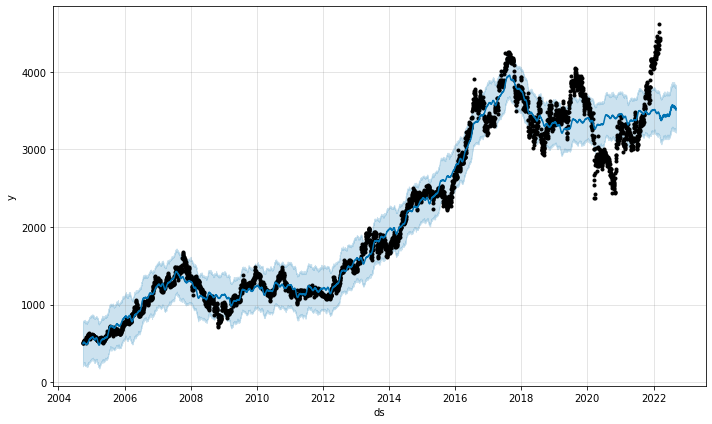

In [ ]:
make_forecast('TLKM.JK', 180)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5136,2024-03-05,8676.859219,8261.585514,9145.147174,8299.773374,8990.648843,49.493059,49.493059,49.493059,1.678718,1.678718,1.678718,47.814340,47.814340,47.814340,0.0,0.0,0.0,8726.352278
5137,2024-03-06,8678.816576,8213.596086,9172.840221,8300.877411,8993.119674,47.274741,47.274741,47.274741,6.173788,6.173788,6.173788,41.100953,41.100953,41.100953,0.0,0.0,0.0,8726.091317
5138,2024-03-07,8680.773933,8237.893999,9165.994968,8301.981448,8995.590505,41.699478,41.699478,41.699478,7.413966,7.413966,7.413966,34.285512,34.285512,34.285512,0.0,0.0,0.0,8722.473411
5139,2024-03-08,8682.731290,8230.731790,9148.381974,8303.085485,8998.061336,34.826192,34.826192,34.826192,7.385666,7.385666,7.385666,27.440526,27.440526,27.440526,0.0,0.0,0.0,8717.557482
5140,2024-03-09,8684.688647,8198.194117,9116.500709,8304.240180,9000.532167,8.325551,8.325551,8.325551,-12.313334,-12.313334,-12.313334,20.638885,20.638885,20.638885,0.0,0.0,0.0,8693.014198


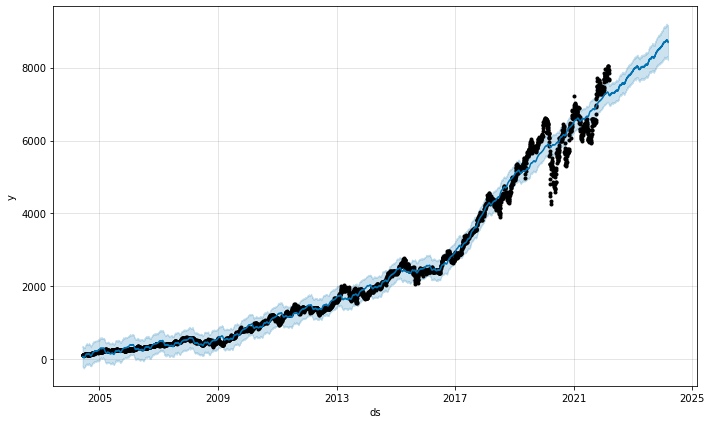

In [ ]:
# BCA
n = 365*2 #Two years
make_forecast('BBCA.JK', n).tail()

,ds,yhat,yhat_lower,yhat_upper
4526,2022-03-11,5496.932670,4713.155507,6277.792195
4527,2022-03-12,5517.189634,4720.915424,6231.257399
4528,2022-03-13,5504.353284,4669.373900,6270.601350
4529,2022-03-14,5442.403367,4696.784418,6189.350274
4530,2022-03-15,5423.573687,4680.182327,6210.093085
...,...,...,...,...
4886,2023-03-06,4916.336616,3983.839292,5785.528537
4887,2023-03-07,4896.812733,3991.887491,5728.734400
4888,2023-03-08,4890.818368,3955.845625,5772.722253
4889,2023-03-09,4886.448463,4025.609595,5750.324680


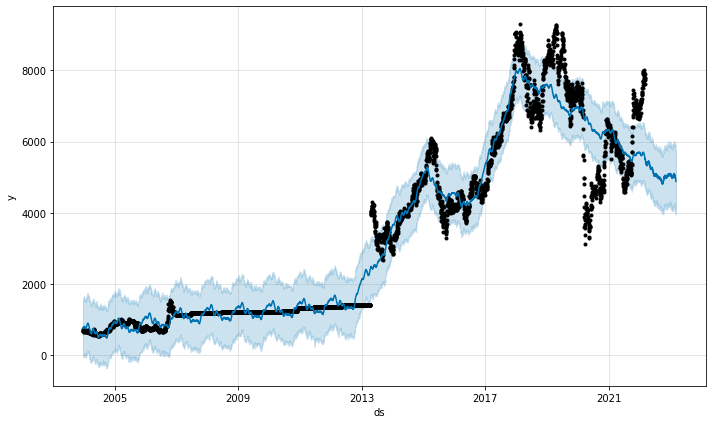

In [9]:
n = 365  # set variable for number of days to predict

# snapchat
snap_forecast = make_forecast('BBNI.JK', n)

# only keep the future forecast, and forget most columns
snap_forecast = snap_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)
snap_forecast